<a href="https://colab.research.google.com/github/scrunts23/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# imports 

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp

In [0]:
# write def for drunk positive 

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  prob_positive = prob_drunk_prior*true_positive_rate + (1.-prob_drunk_prior)*false_positive_rate
  return prob_drunk_prior * true_positive_rate / prob_positive

In [3]:
# test def out 

test = prob_drunk_given_positive(1/1000, 0.08, 1.0)
test

0.012357884330202669

In [4]:
# run test again (2nd)

test1 = prob_drunk_given_positive(test, 0.08, 1.0)
test1

0.13525210993291495

In [5]:
# run test again (3rd)

test2 = prob_drunk_given_positive(test1, 0.08, 1.0)
test2

0.6615996951348605

In [6]:
# run test again (4th)

test3 = prob_drunk_given_positive(test2, 0.08, 1.0)
test3

0.9606895076105054

From tests we can say that it does take four test to be certian a person is above the legal limit given the variables.

In [7]:
# read in voting data from 1984 voting data 

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-02 19:49:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-02 19:49:39 (128 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# set column headers for voting data

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

voting_data = pd.read_csv("house-votes-84.data", header=None, names=column_headers)


# replace ? values to NaN values 

voting_data = voting_data.replace({"y": 1, "n": 0, "?": np.NaN})

# split data by party
rep = voting_data[voting_data["party"] == "republican"]
dem = voting_data[voting_data["party"] == "democrat"]

In [33]:
# Generate and numerically represent a confidence interval

data = np.array(rep['education'])
data = data[~np.isnan(data)]
mean = np.mean(data, )
n = len(data)
stderr = np.std(data, ddof=1)/np.sqrt(n)

lo, hi = t.interval(0.95, n-1, loc=mean, scale=stderr)

print(lo, mean, hi)

0.8176017935029393 0.8709677419354839 0.9243336903680285


In [34]:
# bayes 

from scipy.stats import bayes_mvs

means, _, _ = bayes_mvs(data)
bmean, bmoe = means

print (bmoe[0], bmean, bmoe[1])

0.8262646526926759 0.8709677419354839 0.9156708311782918


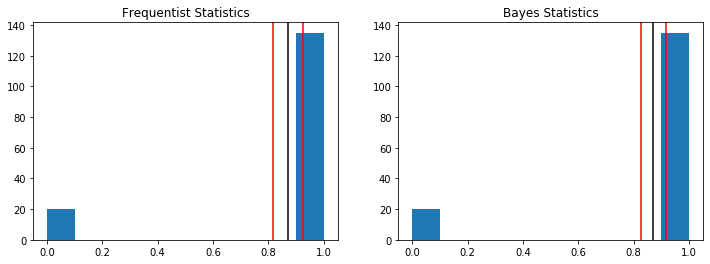

In [36]:
# summarize the difference between Bayesian and Frequentist statistics

fig, ax = plt.subplots(ncols=2)

fig.set_figwidth(12)

ax1, ax2 = ax.flatten()

ax1.hist(data)
ax1.axvline(x=lo, color="red")
ax1.axvline(x=hi, color="red")
ax1.axvline(x=mean, color="k")

ax1.set_title('Frequentist Statistics')

ax2.hist(data)
ax2.axvline(x=bmoe[0], color="red")
ax2.axvline(x=bmoe[1], color="red")
ax2.axvline(x=bmean, color="k")

ax2.set_title('Bayes Statistics')

plt.show()

In [0]:
dem = dem.drop(columns="party")
rep = rep.drop(columns="party")

In [0]:
def confidenceInterval(data, confidence=0.95):
  data = np.array(data)
  data = data[~np.isnan(data)]
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * t.ppf((1.+confidence)/2., n-1)

  ci1, ci2 = t.interval(confidence, n-1, loc=mean, scale=stderr)
  return (ci1, mean, ci2)

In [0]:
def bayesConfidenceInterval(data, confidence=0.95):
  data = np.array(data)
  data = data[~np.isnan(data)]
  means, _, _ = bayes_mvs(data)
  mean, moe = means
  return (moe[0], mean, moe[1])

handicapped-infants


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


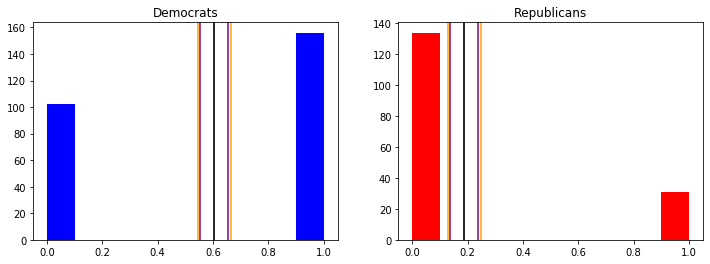

water-project


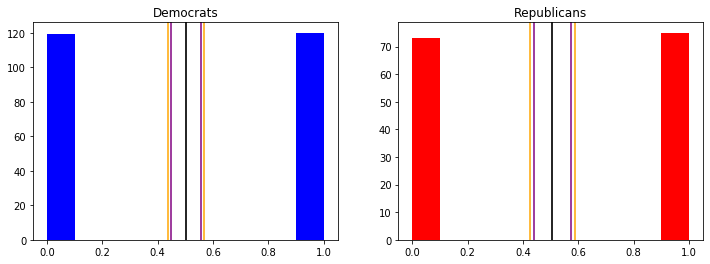

budget


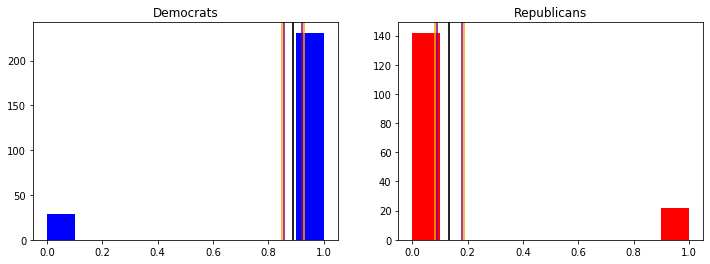

physician-fee-freeze


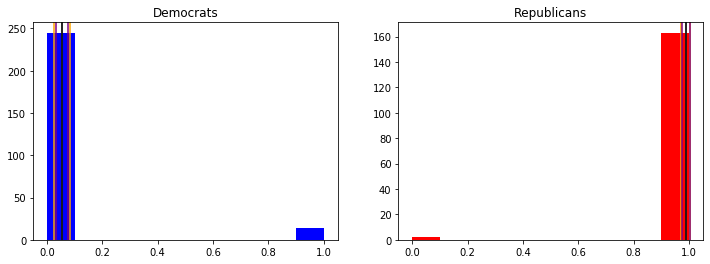

el-salvador-aid


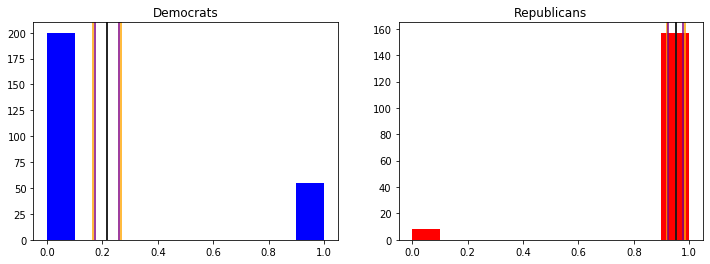

religious-groups


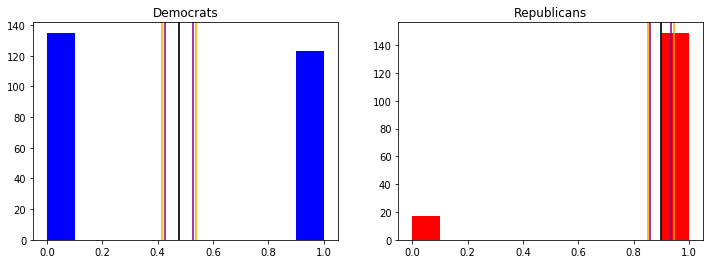

anti-satellite-ban


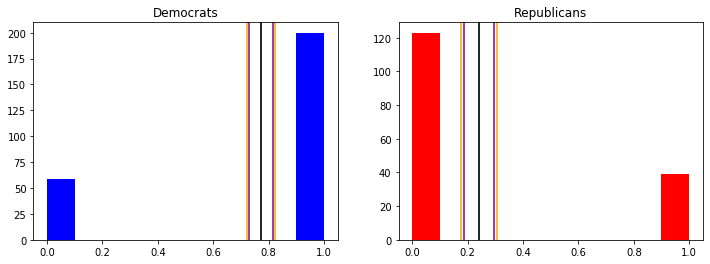

aid-to-contras


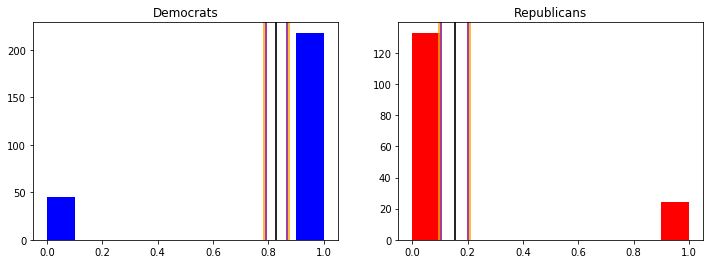

mx-missile


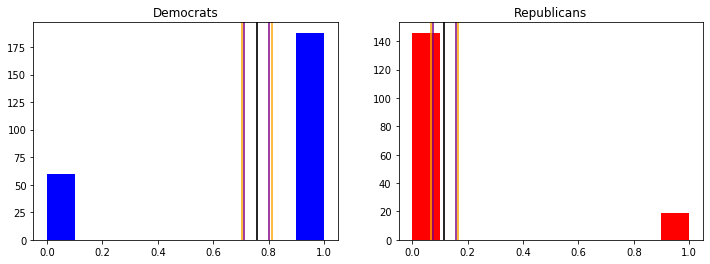

immigration


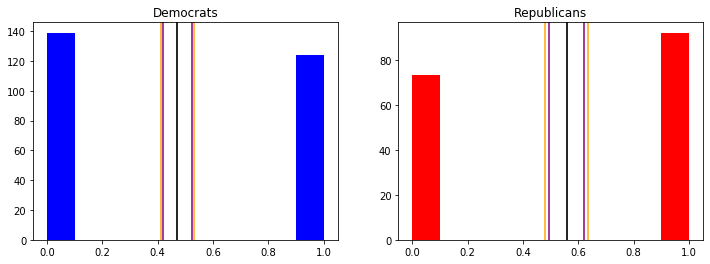

synfuels


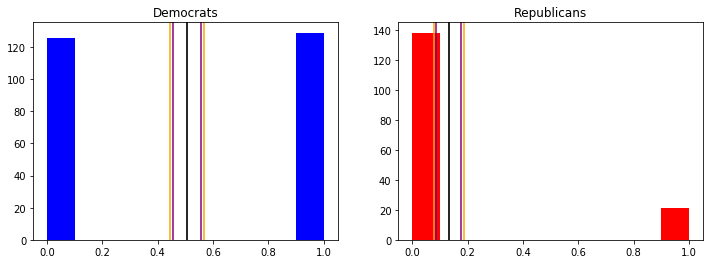

education


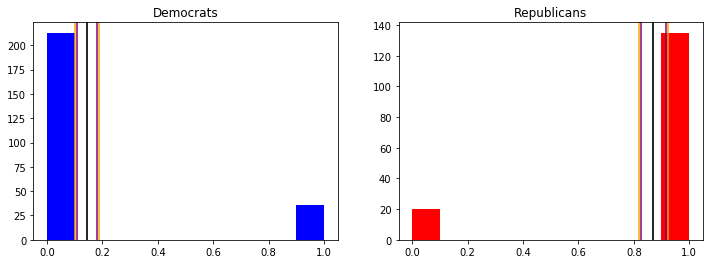

right-to-sue


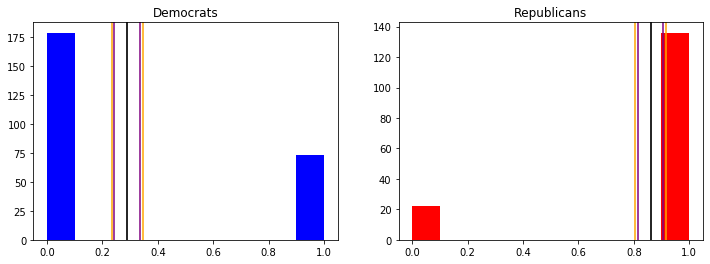

crime


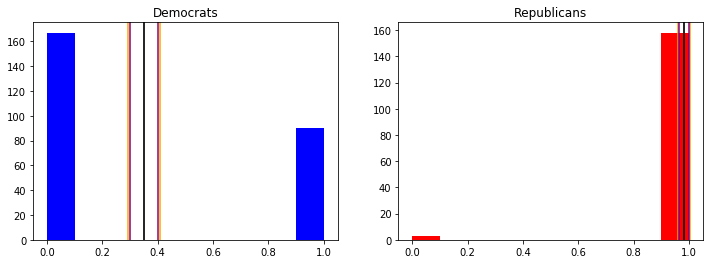

duty-free


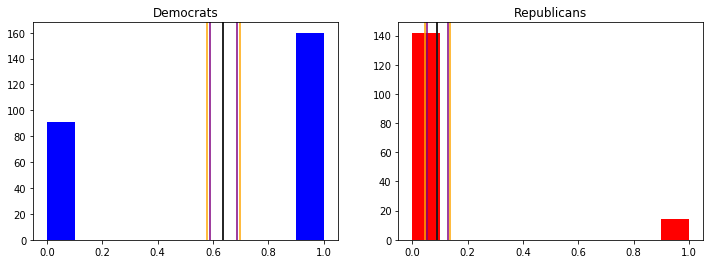

south-africa


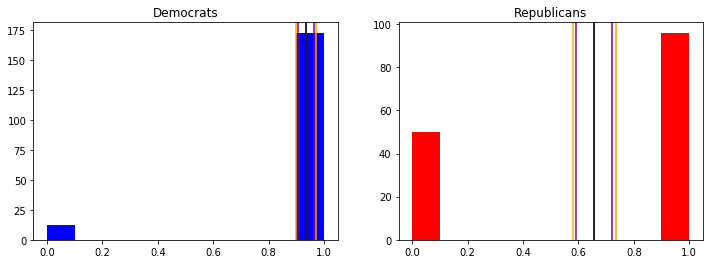

In [45]:
for col in dem.columns:
  print(col)

  fig, ax = plt.subplots(ncols=2)

  fig.set_figwidth(12)

  ax1, ax2 = ax.flatten() 

  ci1, mean, ci2 = confidenceInterval(dem[col])
  ax1.set_title("Democrats")
  ax1.hist(dem[col], color="blue")
  ax1.axvline(x=ci1, color="orange")
  ax1.axvline(x=ci2, color="orange")
  ax1.axvline(x=mean, color="gray")

  ci1, mean, ci2 = bayesConfidenceInterval(dem[col])
  ax1.axvline(x=ci1, color="purple")
  ax1.axvline(x=ci2, color="purple")
  ax1.axvline(x=mean, color="k")

  ci1, mean, ci2 = confidenceInterval(rep[col])
  ax2.set_title("Republicans")
  ax2.hist(rep[col], color="red")
  ax2.axvline(x=ci1, color="orange")
  ax2.axvline(x=ci2, color="orange")
  ax2.axvline(x=mean, color="gray")

  ci1, mean, ci2 = bayesConfidenceInterval(rep[col])
  ax2.axvline(x=ci1, color="purple")
  ax2.axvline(x=ci2, color="purple")
  ax2.axvline(x=mean, color="k")

  plt.show()

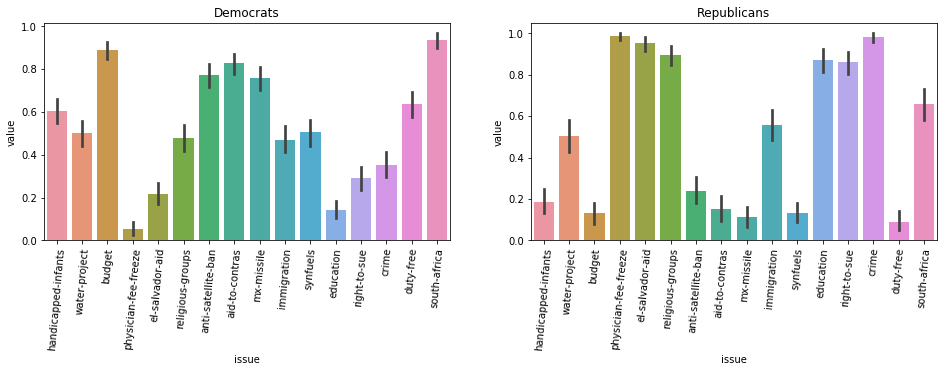

In [49]:
dem_data = dem.melt(var_name="issue", value_vars=dem.columns)
rep_data = rep.melt(var_name="issue", value_vars=rep.columns)

fig, ax = plt.subplots(ncols=2)
fig.set_figwidth(16)
ax1, ax2 = ax

ax1.set_title("Democrats")
sns.barplot(x="issue", y="value", data=dem_data, estimator=np.mean, ci=95, ax=ax1)
xlabels = ax1.get_xticklabels()
for label in xlabels:
  label.set_rotation(85)

ax2.set_title("Republicans")
sns.barplot(x="issue", y="value", data=rep_data, estimator=np.mean, ci=95, ax=ax2)
xlabels = ax2.get_xticklabels()
for label in xlabels:
  label.set_rotation(85)

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!